 # Using Machine Learning Algorithms to predict Passengers Satisfication

In [103]:
# Import Libraries and read datafile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import time
from collections import Counter
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix,accuracy_score,confusion_matrix

In [104]:
#import data file
train = pd.read_csv("train.csv",index_col=None)
test = pd.read_csv("test.csv",index_col=None)
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# 1.Data cleaning

 Drop outliers

In [105]:
numerical_features = train.select_dtypes(exclude=['object']).copy()
numerical_features.columns

Index(['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [106]:
def detect_outliers(df,features):
    outlier_indices=[]
    
    for c in features:
        # 1st quartile
        Q1=np.percentile(df[c],25)
        
        # 3rd quartile
        Q3=np.percentile(df[c],75)
        
        # IQR
        IQR= Q3-Q1
        
        # Outlier Step
        outlier_step= IQR * 1.5
        
        # Detect outlier and their indeces 
        outlier_list_col = df[(df[c]< Q1 - outlier_step)|( df[c] > Q3 + outlier_step)].index
        
        # Store indices 
        outlier_indices.extend(outlier_list_col)
    
    outliers_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i , v in outliers_indices.items() if v>2 )
    return multiple_outliers

In [107]:
train.loc[detect_outliers(train,[ 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'])]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1876,1876,66058,Male,Loyal Customer,66,Business travel,Business,3829,3,5,...,3,3,3,3,1,3,3,42,41.0,neutral or dissatisfied
2363,2363,14315,Female,Loyal Customer,55,Business travel,Business,3861,2,1,...,2,2,3,2,1,2,1,42,39.0,neutral or dissatisfied
2970,2970,120215,Female,Loyal Customer,13,Business travel,Business,3990,3,5,...,3,4,1,3,1,3,3,36,19.0,neutral or dissatisfied
5639,5639,106154,Male,Loyal Customer,37,Business travel,Business,3990,3,5,...,3,3,2,3,1,3,2,44,40.0,neutral or dissatisfied
5732,5732,70437,Female,Loyal Customer,54,Business travel,Business,3801,1,5,...,4,4,3,1,1,4,4,38,28.0,neutral or dissatisfied
14195,14195,14938,Male,Loyal Customer,33,Business travel,Business,3891,3,3,...,5,4,4,1,1,4,5,84,79.0,satisfied
14306,14306,73409,Female,Loyal Customer,61,Business travel,Business,3861,3,3,...,5,5,5,5,1,5,4,42,45.0,satisfied
18509,18509,110386,Female,Loyal Customer,9,Business travel,Business,3814,2,3,...,2,3,1,4,1,3,2,83,83.0,neutral or dissatisfied
20311,20311,45906,Male,Loyal Customer,36,Business travel,Business,3901,3,1,...,3,3,3,3,1,3,2,75,71.0,neutral or dissatisfied
21191,21191,74135,Female,Loyal Customer,45,Business travel,Business,3897,1,5,...,4,2,4,3,1,1,1,123,134.0,neutral or dissatisfied


In [108]:
train = train.drop(detect_outliers(train,[ 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes']),axis = 0).reset_index(drop = True)
test = test.drop(detect_outliers(test,[ 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes']),axis = 0).reset_index(drop = True)

Drop missing data

In [109]:
# Check for missing data
print("There is {} missing values in train data frame".format(train.isnull().sum().sum()))
print("There is {} missing values in test data frame".format(test.isnull().sum().sum()))

There is 309 missing values in train data frame
There is 83 missing values in test data frame


In [110]:
# Remove missing data
train.dropna(axis=0,inplace=True)
test.dropna(axis=0,inplace=True)
print("There is {} missing values in train data frame".format(train.isnull().sum().sum()))
print("There is {} missing values in test data frame".format(test.isnull().sum().sum()))

There is 0 missing values in train data frame
There is 0 missing values in test data frame


Drop duplicate data

In [111]:
# Check for duplicate data
print("There is {} duplicated values in train data frame".format(train.duplicated().sum()))
duplicated = train[train.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=[ "Gender", "id"], ascending= False) 

There is 0 duplicated values in train data frame


transfer the categorical value into numerical value

In [112]:
def transform_gender(x):
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
    else:
        return -1
    
def transform_customer_type(x):
    if x == 'Loyal Customer':
        return 1
    elif x == 'disloyal Customer':
        return 0
    else:
        return -1
    
def transform_travel_type(x):
    if x == 'Business travel':
        return 1
    elif x == 'Personal Travel':
        return 0
    else:
        return -1
    
def transform_class(x):
    if x == 'Business':
        return 2
    elif x == 'Eco Plus':
        return 1
    elif x == 'Eco':
        return 0    
    else:
        return -1
    
def transform_satisfaction(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
    else:
        return -1
    
def process_data(df):
    df = df.drop(['Unnamed: 0', 'id'], axis = 1)
    df['Gender'] = df['Gender'].apply(transform_gender)
    df['Customer Type'] = df['Customer Type'].apply(transform_customer_type)
    df['Type of Travel'] = df['Type of Travel'].apply(transform_travel_type)
    df['Class'] = df['Class'].apply(transform_class)
    df['satisfaction'] = df['satisfaction'].apply(transform_satisfaction)
    df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace = True)
    
    return df

train = process_data(train)
test = process_data(test)

# 2.Data Description

In [113]:
train.head(3).append(train.tail(3))

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,0,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
103861,0,0,30,1,2,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103862,1,0,22,1,0,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0
103863,0,1,27,1,2,1723,1,3,3,3,...,1,1,1,4,4,3,1,0,0.0,0


In [114]:
# Explore the data
train.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103555.000000,103555.000000,103555.000000,103555.000000,103555.000000,103555.000000,103555.000000,103555.000000,103555.000000,103555.000000,...,103555.000000,103555.000000,103555.000000,103555.000000,103555.000000,103555.000000,103555.000000,103555.000000,103555.000000,103555.000000
mean,0.507489,0.817189,39.379991,0.689740,1.028014,1188.311236,2.730028,3.060152,2.756921,2.977056,...,3.358515,3.382734,3.351591,3.631964,3.305190,3.641031,3.286746,14.725132,15.156796,0.433480
std,0.499946,0.386513,15.113337,0.462602,0.962864,996.114165,1.327881,1.525166,1.398832,1.277593,...,1.333021,1.288249,1.315359,1.180985,1.264844,1.175517,1.312042,38.092251,38.676624,0.495558
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,40.000000,1.000000,1.000000,842.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,51.000000,1.000000,2.000000,1740.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [13]:
train['satisfaction'].value_counts()

0    58666
1    44889
Name: satisfaction, dtype: int64

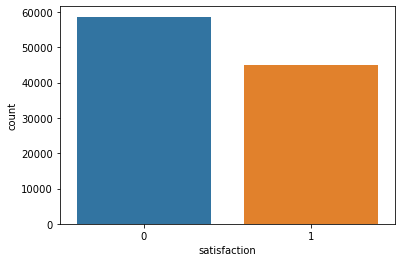

In [14]:
sns.countplot(x='satisfaction',data=train)

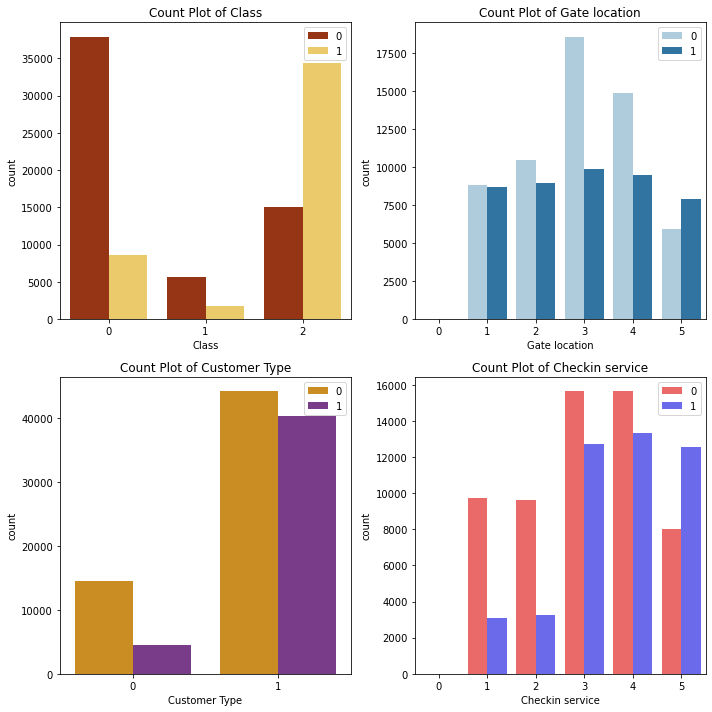

In [15]:
# visualize four bar charts on the corresponding x and y
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(data=train, x="Class" , hue="satisfaction", palette="afmhot")
plt.title("Count Plot of Class")
plt.legend()

plt.subplot(2,2,2)
sns.countplot(data=train, x="Gate location" , hue="satisfaction", palette="Paired")
plt.title("Count Plot of Gate location")
plt.legend()

plt.subplot(2,2,3)
sns.countplot(data=train, x="Customer Type" , hue="satisfaction", palette="CMRmap_r")
plt.title("Count Plot of Customer Type")
plt.legend()

plt.subplot(2,2,4)
sns.countplot(data=train, x="Checkin service" , hue="satisfaction", palette="seismic_r")
plt.title("Count Plot of Checkin service")
plt.legend()
plt.tight_layout()
plt.show()

From countplot we can say the classes are almost balanced, the amount of dissatisfied people is 30.77% higher than satisfied people

In [16]:
# Correlations in one-hot encoded dataframe
train.corr()['satisfaction'].sort_values()

Arrival Delay in Minutes            -0.057383
Departure/Arrival time convenient   -0.051710
Departure Delay in Minutes          -0.050309
Gender                              -0.012343
Gate location                        0.000533
Age                                  0.136945
Ease of Online booking               0.171718
Customer Type                        0.187661
Food and drink                       0.209668
Checkin service                      0.235785
Inflight service                     0.244675
Baggage handling                     0.247667
Inflight wifi service                0.284194
Flight Distance                      0.299844
Cleanliness                          0.304935
Leg room service                     0.313072
On-board service                     0.322353
Seat comfort                         0.349052
Inflight entertainment               0.398085
Type of Travel                       0.449223
Class                                0.494896
Online boarding                   

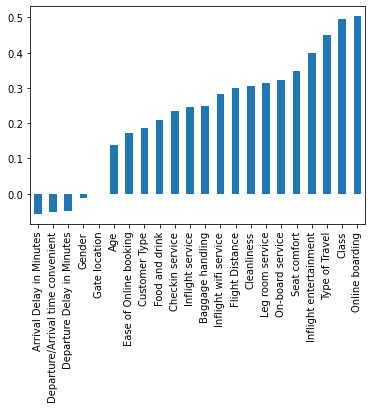

In [17]:
# visualize the correlations result
train.corr()['satisfaction'].sort_values().drop('satisfaction').plot(kind='bar')

#Best features - Online Booking, Class, and Type of Travel
#Worst features - Gate location, Gender, and Departure/Arrival Time Convenient
#online boarding have maximum correlation with satisfaction
#Arrive Delay and Departure time convenient are more likely to make people feel unsatisfied

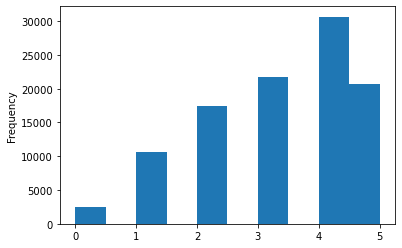

In [18]:
train['Online boarding'].plot(kind='hist',bins=10)

Let's check the correlation of online boarding with others

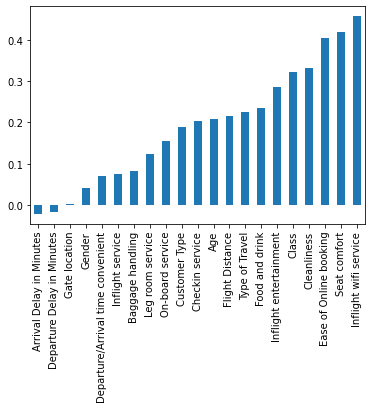

In [19]:
train.corr()['Online boarding'].sort_values().drop(['Online boarding','satisfaction']).plot(kind='bar')

People who get better wifi service will be more willing to apply for online boarding and score higher

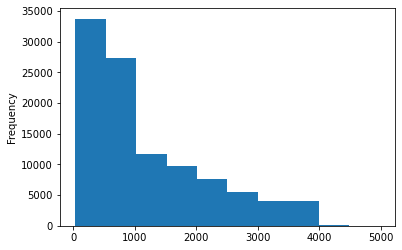

In [20]:
#Analysing some general trends from the dataset 
train['Flight Distance'].plot(kind='hist',bins=10)

Most of the flights are between 0 to 1,000 kms

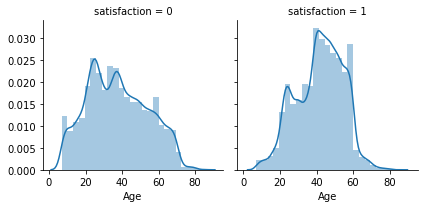

In [21]:
g= sns.FacetGrid(train,col="satisfaction")
g.map(sns.distplot,"Age",bins=25)
plt.show()
# 0=neutral or dissatisfied, 1=satisfied 

#0-20 years old is generally neutral or dissatisfied with the flight.
#30-60 years old is generally satisfied with the flight.
#65-80 years old passengers is neutral or dissatisfied.

In [22]:
# Age vs satisfaction
train[['Age','satisfaction']].groupby(['Age'],as_index=False).mean().sort_values(by='satisfaction',ascending=False)

,Age,satisfaction
34,41,0.607755
39,46,0.599273
44,51,0.598287
50,57,0.590394
45,52,0.586089
...,...,...
2,9,0.137026
63,70,0.136808
3,10,0.130690
1,8,0.108320


The most satisfied age group 46-56

In [23]:
# Food_and_drink vs satisfaction
train[["Food and drink","satisfaction"]].groupby(["Food and drink"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Food and drink,satisfaction
5,5,0.548824
4,4,0.525260
0,0,0.466667
3,3,0.396329
2,2,0.388453
1,1,0.200141


20% of the passengers who do not like the food are satisfied with the flight (Interesting statitic).

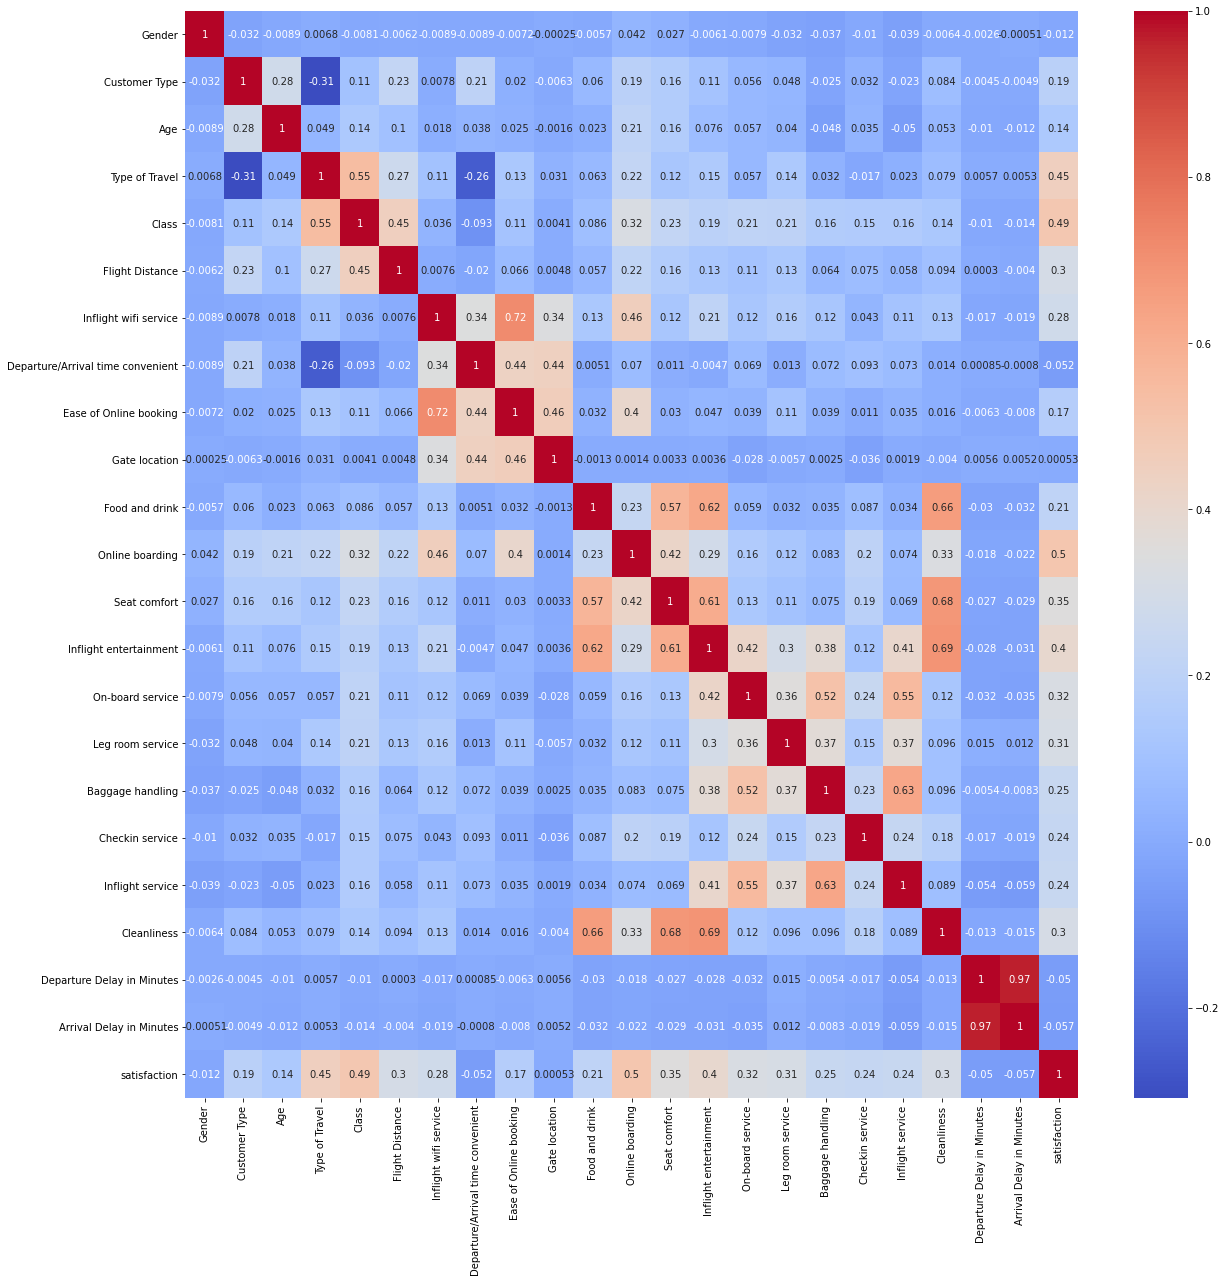

In [24]:
traincorr = train.corr()
fig,ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(traincorr,annot = True,cmap='coolwarm')
plt.show()

# 3.Data processing

### Train/Test Split

In [25]:
# Split into test and train
X_train = train.drop('satisfaction',axis=1)
y_train = train['satisfaction']
X_test = test.drop('satisfaction',axis=1)
y_test = test['satisfaction']

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [26]:
print("X_train {}\nX_test {}\ny_train {}\ny_test {}".format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

X_train (103555, 22)
X_test (25887, 22)
y_train (103555,)
y_test (25887,)


### Model Evaluation

Logistic Regression


In [27]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state=0)
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics

In [28]:
%time classifier1.fit(X_train,y_train)

CPU times: user 467 ms, sys: 15.1 ms, total: 482 ms
Wall time: 275 ms


LogisticRegression(random_state=0)

In [77]:
y_pred = classifier1.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred)))
print('Precision score : {}'. format (precision_score(y_test, y_pred)))
print('Recall score : {}'. format(recall_score(y_test, y_pred)))
acc_LG = accuracy_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
print('The Mean Square Error is {}'. format(round(mse, 2)))


              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14524
           1       0.87      0.83      0.85     11363

    accuracy                           0.87     25887
   macro avg       0.87      0.87      0.87     25887
weighted avg       0.87      0.87      0.87     25887

Accuracy score : 0.8715571522385753
Precision score : 0.8702100221075902
Recall score : 0.8313825574232157
The Mean Square Error is 0.13


In [43]:
print(classifier1.coef_)
print(classifier1.intercept_)

[[-0.02352857  0.77254741 -0.12308361  1.26832897  0.34468815  0.00455842
   0.51182459 -0.19177954 -0.19586158  0.03771691 -0.03628749  0.83446712
   0.09137446  0.08075126  0.39432524  0.33515326  0.16032639  0.41177484
   0.14469224  0.2916012   0.18184929 -0.36534699]]
[-0.50958184]


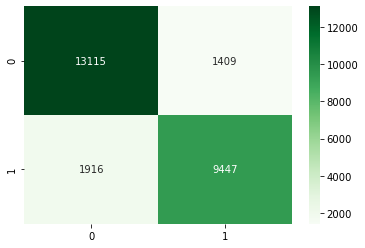

In [44]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix,annot = True, fmt="g",cmap="Greens")
plt.show()

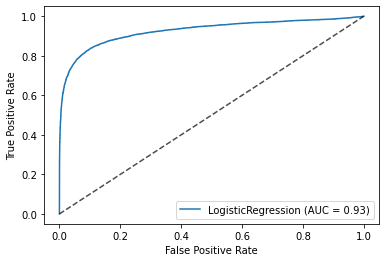

In [45]:
graph1 = plot_roc_curve(classifier1, X_test, y_test)
plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
plt.show()

Linear SVM

In [52]:
from sklearn.svm import LinearSVC
classifier2 = LinearSVC(random_state=0)

In [53]:
 %time classifier2.fit(X_train,y_train)

CPU times: user 42.1 s, sys: 373 ms, total: 42.5 s
Wall time: 44.2 s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(random_state=0)

In [78]:
y_pred = classifier2.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred)))
print('Precision score : {}'. format (precision_score(y_test, y_pred)))
print('Recall score : {}'. format(recall_score(y_test, y_pred)))
acc_SVM = accuracy_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
print('The Mean Square Error is {}'. format(round(mse, 2)))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14524
           1       0.87      0.83      0.85     11363

    accuracy                           0.87     25887
   macro avg       0.87      0.87      0.87     25887
weighted avg       0.87      0.87      0.87     25887

Accuracy score : 0.8709777108201028
Precision score : 0.8709200184928341
Recall score : 0.8289184194314881
The Mean Square Error is 0.13


In [61]:
print(classifier2.coef_)
print(classifier2.intercept_)

[[-0.0080682   0.25635864 -0.04033453  0.4120656   0.11860328  0.0033659
   0.18424749 -0.05714029 -0.09694689  0.01175614 -0.01042168  0.25299394
   0.02815845  0.03315743  0.11824437  0.1041057   0.04815655  0.12375935
   0.04171397  0.08873141  0.05030196 -0.11022191]]
[-0.16687876]


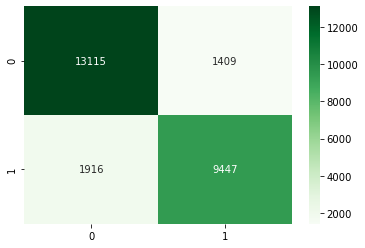

In [62]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix,annot = True, fmt="g",cmap="Greens")
plt.show()

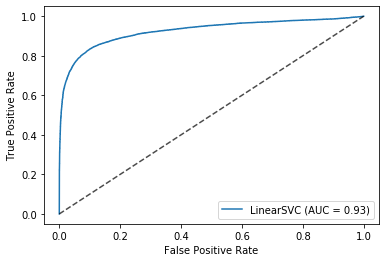

In [142]:
graph2 = plot_roc_curve(classifier2, X_test, y_test)
plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
plt.show()

RandomForeast

In [63]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(random_state=0)

In [64]:
 %time classifier3.fit(X_train,y_train)

CPU times: user 15.3 s, sys: 333 ms, total: 15.7 s
Wall time: 16 s


RandomForestClassifier(random_state=0)

In [79]:
y_pred = classifier3.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred)))
print('Precision score : {}'. format (precision_score(y_test, y_pred)))
print('Recall score : {}'. format(recall_score(y_test, y_pred)))
acc_random_forest = accuracy_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
print('The Mean Square Error is {}'. format(round(mse, 2)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14524
           1       0.97      0.94      0.96     11363

    accuracy                           0.96     25887
   macro avg       0.96      0.96      0.96     25887
weighted avg       0.96      0.96      0.96     25887

Accuracy score : 0.9626067137945687
Precision score : 0.9712575936168284
Recall score : 0.9427087916923348
The Mean Square Error is 0.04


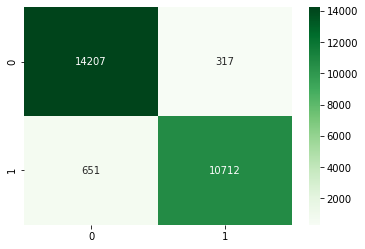

In [146]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix,annot = True, fmt="g",cmap="Greens")
plt.show()

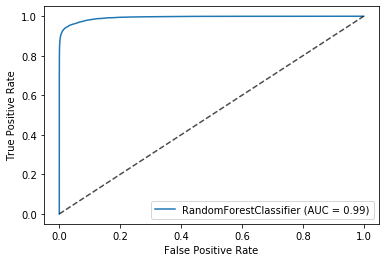

In [147]:
graph3 = plot_roc_curve(classifier3, X_test, y_test)
plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
plt.show()

Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
classifier4 =DecisionTreeClassifier(random_state=0)

In [66]:
 %time classifier4.fit(X_train,y_train)

CPU times: user 896 ms, sys: 68.4 ms, total: 965 ms
Wall time: 997 ms


DecisionTreeClassifier(random_state=0)

In [80]:
y_pred = classifier4.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred)))
print('Precision score : {}'. format (precision_score(y_test, y_pred)))
print('Recall score : {}'. format(recall_score(y_test, y_pred)))
acc_DecisionTree = accuracy_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
print('The Mean Square Error is {}'. format(round(mse, 2)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14524
           1       0.94      0.94      0.94     11363

    accuracy                           0.95     25887
   macro avg       0.95      0.95      0.95     25887
weighted avg       0.95      0.95      0.95     25887

Accuracy score : 0.9460733186541508
Precision score : 0.9368808626282108
Recall score : 0.9405086684854352
The Mean Square Error is 0.05


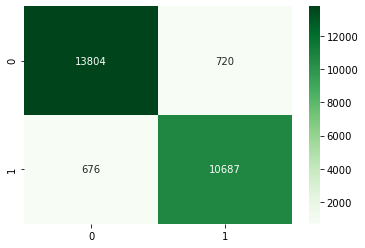

In [68]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix,annot = True, fmt="g",cmap="Greens")
plt.show()

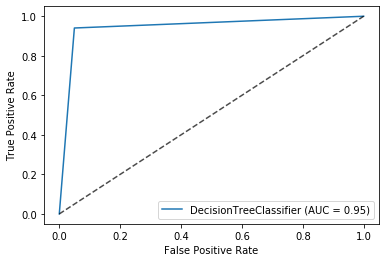

In [152]:
graph4 = plot_roc_curve(classifier4, X_test, y_test)
plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
plt.show()

AdaBoost

In [81]:
from sklearn.ensemble import AdaBoostClassifier
classifier5 = AdaBoostClassifier(random_state=0)

In [82]:
 %time classifier5.fit(X_train,y_train)

CPU times: user 5.53 s, sys: 360 ms, total: 5.89 s
Wall time: 5.95 s


AdaBoostClassifier(random_state=0)

In [83]:
y_pred = classifier5.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred)))
print('Precision score : {}'. format (precision_score(y_test, y_pred)))
print('Recall score : {}'. format(recall_score(y_test, y_pred)))
acc_Ada = accuracy_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
print('The Mean Square Error is {}'. format(round(mse, 2)))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     14524
           1       0.92      0.91      0.92     11363

    accuracy                           0.93     25887
   macro avg       0.93      0.92      0.93     25887
weighted avg       0.93      0.93      0.93     25887

Accuracy score : 0.9262950515702862
Precision score : 0.9219098616688978
Recall score : 0.9090909090909091
The Mean Square Error is 0.07


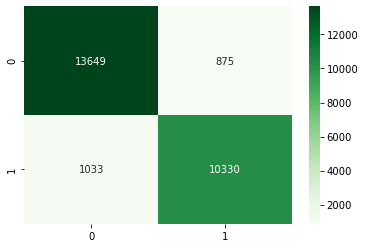

In [84]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix,annot = True, fmt="g",cmap="Greens")
plt.show()

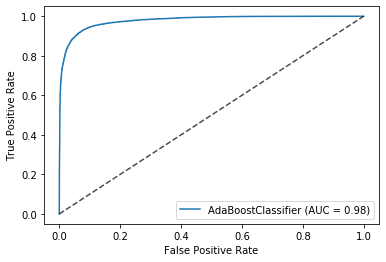

In [157]:
graph5 = plot_roc_curve(classifier5, X_test, y_test)
plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
plt.show()

### Comparing the results

In [120]:
auc_scores = [acc_LG,acc_SVM,acc_random_forest,acc_DecisionTree,acc_Ada]
model_scores = pd.DataFrame(auc_scores, index=['Logistic Regression','Linear SVM','RandomForeast','Decision Tree','AdaBoost'], columns=['AUC'])
model_scores.head()

,AUC
Logistic Regression,0.871557
Linear SVM,0.870978
RandomForeast,0.962607
Decision Tree,0.946073
AdaBoost,0.926295


In [130]:
def Check(list_of_disp):
    ax = plt.gca()
    for i in list_of_disp: 
        i.plot(ax=ax)
    plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
    plt.show()

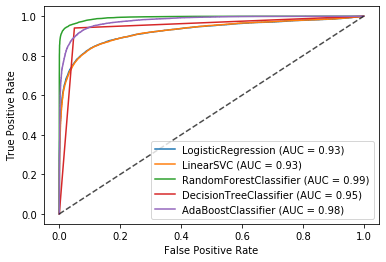

In [131]:
list_of_disp = [graph1,graph2,graph3,graph4,graph5]
Check(list_of_disp)